## Importing required libraries

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing libraries
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# Model Training libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter tuning and model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Importing the dataset
df = pd.read_csv('Bank_Telemarketing.csv')

In [3]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25309,40,technician,single,secondary,no,1411,yes,yes,cellular,18,nov,93,3,-1,0,unknown,no
13802,42,blue-collar,divorced,secondary,no,898,yes,no,cellular,10,jul,347,1,-1,0,unknown,no
41434,43,management,married,tertiary,no,13450,yes,no,cellular,4,sep,128,1,-1,0,unknown,no
35974,36,blue-collar,married,primary,no,0,yes,no,cellular,8,may,108,2,367,2,failure,no
5203,33,blue-collar,married,primary,no,511,yes,no,unknown,21,may,304,2,-1,0,unknown,no


# Understanding our data

1.    Age: Age of the client
2.    job: Type of client's job
3.    marital: client's marital status
4.    education: Highest education of client
5.    default: credit default status
6.    balance: balance of customers bank account
7.    housing: housing loan (yes or no)
8.    loan: personal loan (yes or no)
9.    contact: Type of contact communication with the client
10.   day: date at which contacted with the client
11.   month: Last month of the year contacting to the client
12.   duration: Duration of client contact ( seconds )
13.   campaign: Number of contacts performed during this campaign and for this client
14.   pdays: Number of days elapsed after the client's last contacted (-1 indicated cliend was previously not contacted)
15.   previous: Number of contacts performed before this campaign and for this client
16.   poutcome: Outcome of the previous marketing campaign
17.   y: invested or not ( target column )


In [4]:
# Renaming columns for better understanding
df.rename(columns={'loan':'personal_loan','default':'credit_default','housing':'housing_loan','day':'date','y':'subscribed'},inplace=True)

In [5]:
df.sample(4)

,age,job,marital,education,credit_default,balance,housing_loan,personal_loan,contact,date,month,duration,campaign,pdays,previous,poutcome,subscribed
38479,21,admin.,single,secondary,no,66,yes,no,cellular,15,may,31,1,330,2,failure,no
27270,48,blue-collar,married,secondary,no,2697,yes,yes,cellular,21,nov,82,1,179,5,failure,no
16762,31,blue-collar,married,primary,no,33,yes,no,cellular,24,jul,901,2,-1,0,unknown,yes
20395,34,technician,single,tertiary,no,1039,no,no,cellular,11,aug,342,3,-1,0,unknown,no


## EDA

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default', 'balance',
       'housing_loan', 'personal_loan', 'contact', 'date', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education       45211 non-null  object
 4   credit_default  45211 non-null  object
 5   balance         45211 non-null  int64 
 6   housing_loan    45211 non-null  object
 7   personal_loan   45211 non-null  object
 8   contact         45211 non-null  object
 9   date            45211 non-null  int64 
 10  month           45211 non-null  object
 11  duration        45211 non-null  int64 
 12  campaign        45211 non-null  int64 
 13  pdays           45211 non-null  int64 
 14  previous        45211 non-null  int64 
 15  poutcome        45211 non-null  object
 16  subscribed      45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# Checking stastical meausres in the data
df.describe()

,age,balance,date,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# checking if there are duplicate values
df.duplicated().sum()

np.int64(0)

## Analyzing the distribution of numerical columns

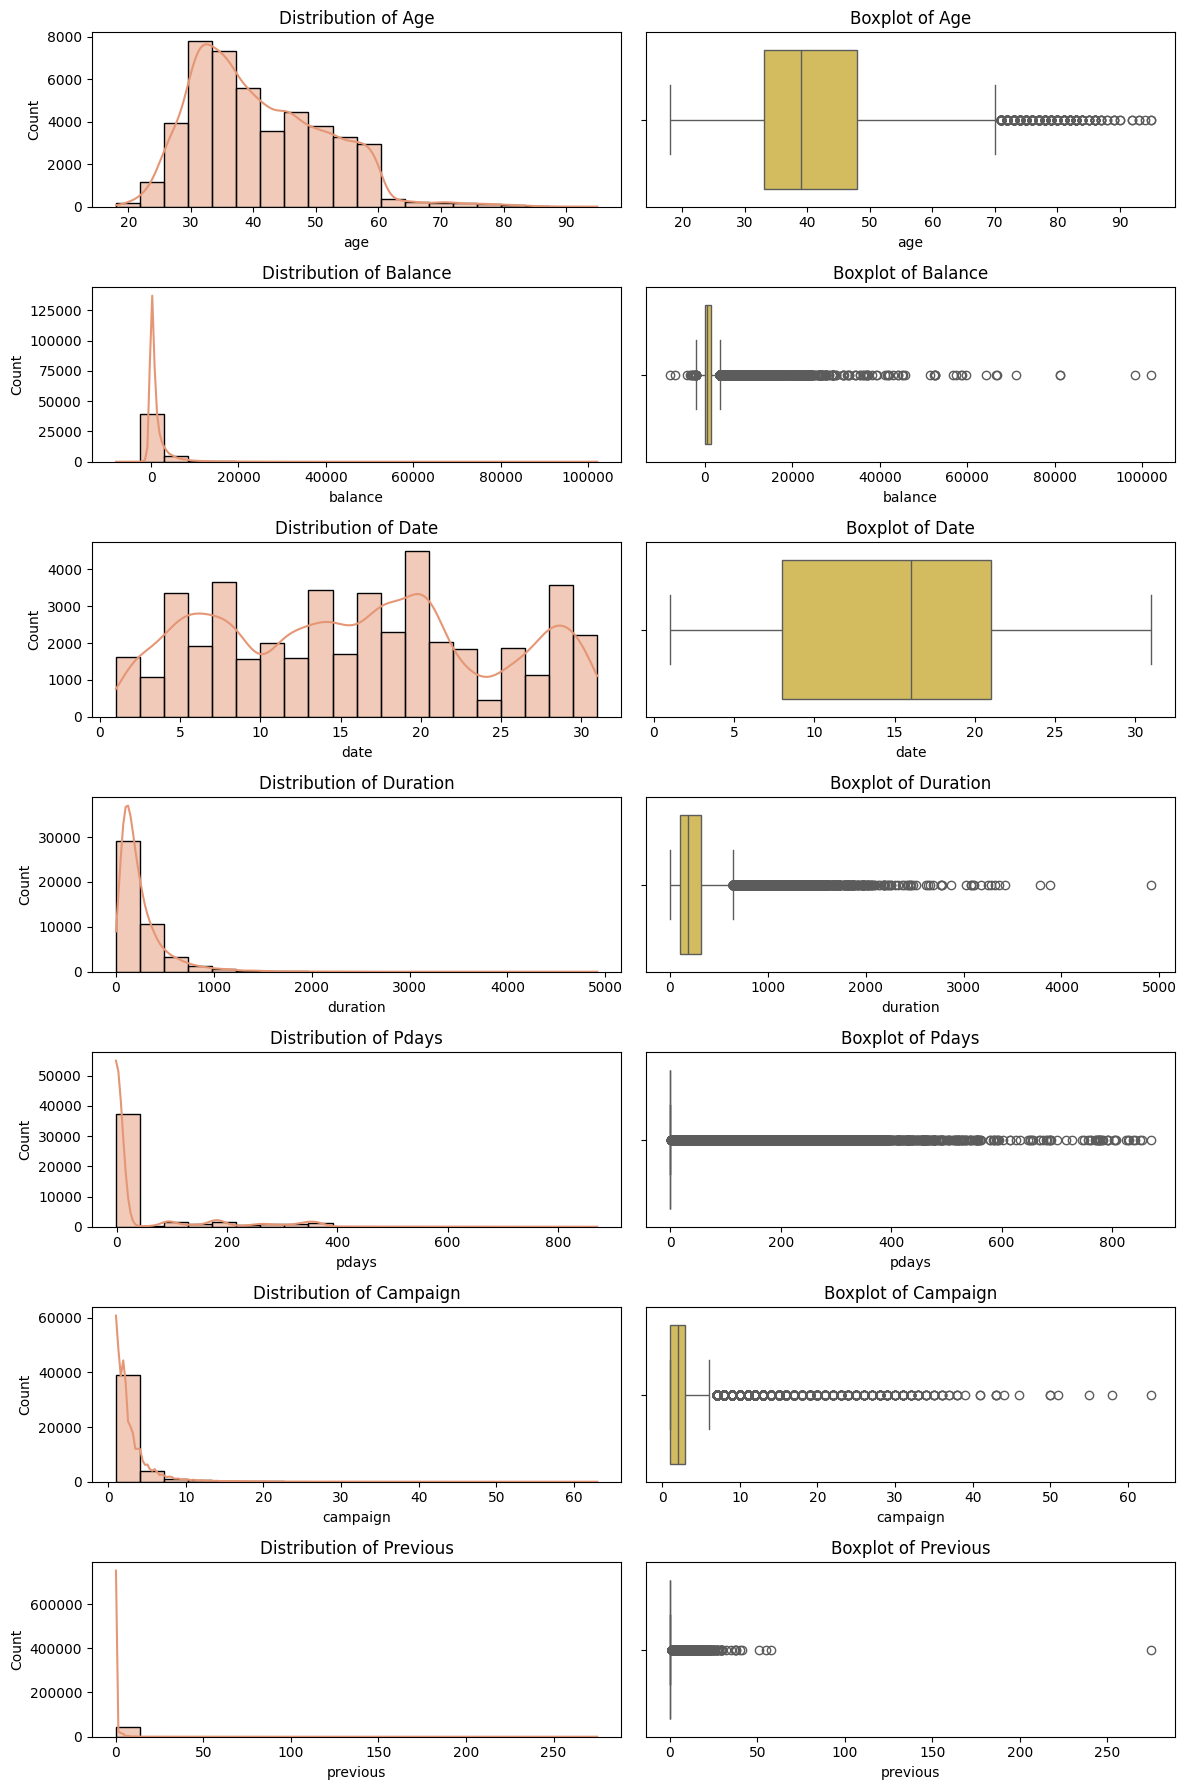

In [10]:
plt.figure(figsize=(12, 18))

# Age Distribution
plt.subplot(7, 2, 1)
plt.title('Distribution of Age')
sns.histplot(df['age'], kde=True, bins=20, color='#E59675')

plt.subplot(7, 2, 2)
plt.title('Boxplot of Age')
sns.boxplot(x=df['age'], color='#E6C74D')

# Balance Distribution
plt.subplot(7, 2, 3)
plt.title('Distribution of Balance')
sns.histplot(df['balance'], kde=True, bins=20, color='#E59675')

plt.subplot(7, 2, 4)
plt.title('Boxplot of Balance')
sns.boxplot(x=df['balance'], color='#E6C74D')

# Date Distribution
plt.subplot(7, 2, 5)
plt.title('Distribution of Date')
sns.histplot(df['date'], kde=True, bins=20, color='#E59675')

plt.subplot(7, 2, 6)
plt.title('Boxplot of Date')
sns.boxplot(x=df['date'], color='#E6C74D')

# Duration Distribution
plt.subplot(7, 2, 7)
plt.title('Distribution of Duration')
sns.histplot(df['duration'], kde=True, bins=20, color='#E59675')

plt.subplot(7, 2, 8)
plt.title('Boxplot of Duration')
sns.boxplot(x=df['duration'], color='#E6C74D')

# Pdays Distribution
plt.subplot(7, 2, 9)
plt.title('Distribution of Pdays')
sns.histplot(df['pdays'], kde=True, bins=20, color='#E59675')

plt.subplot(7, 2, 10)
plt.title('Boxplot of Pdays')
sns.boxplot(x=df['pdays'], color='#E6C74D')

# Campaign Distribution
plt.subplot(7, 2, 11)
plt.title('Distribution of Campaign')
sns.histplot(df['campaign'], kde=True, bins=20, color='#E59675')

plt.subplot(7, 2, 12)
plt.title('Boxplot of Campaign')
sns.boxplot(x=df['campaign'], color='#E6C74D')

# Previous Distribution
plt.subplot(7, 2, 13)
plt.title('Distribution of Previous')
sns.histplot(df['previous'], kde=True, bins=20, color='#E59675')

plt.subplot(7, 2, 14)
plt.title('Boxplot of Previous')
sns.boxplot(x=df['previous'], color='#E6C74D')

plt.tight_layout()
plt.show()


## Analyzing the distribution of Categorical columns

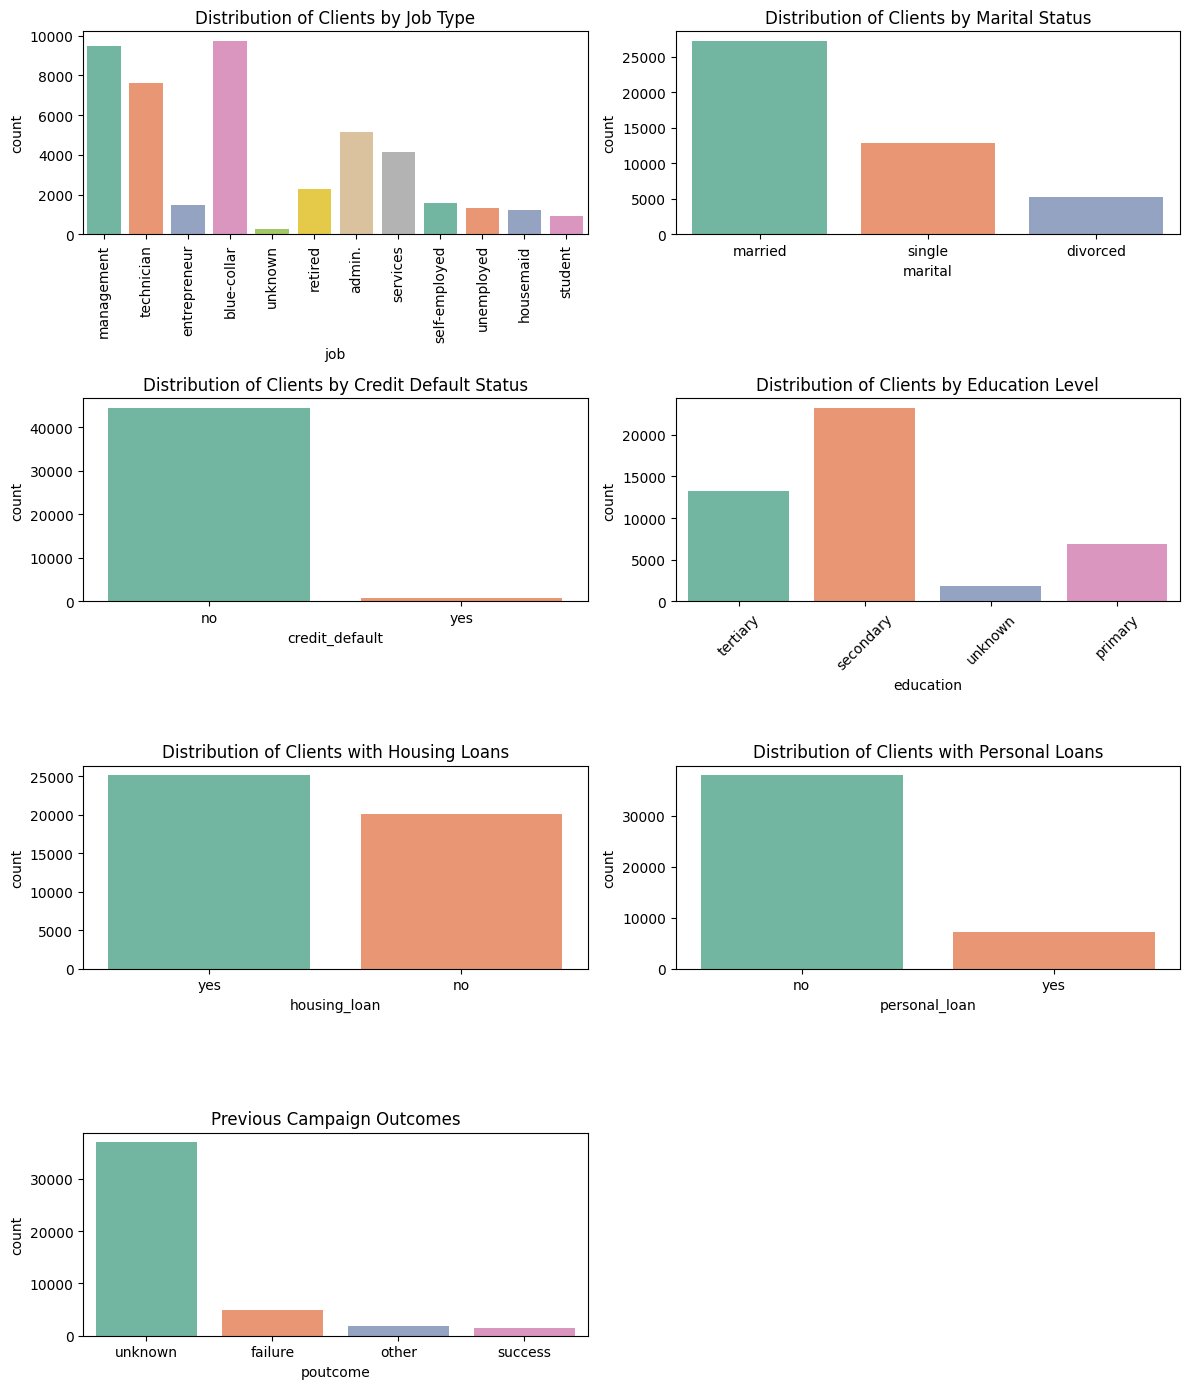

In [11]:
plt.figure(figsize=(12, 14))

# Job Type Distribution
plt.subplot(4, 2, 1)
plt.title('Distribution of Clients by Job Type')
sns.countplot(x='job', data=df, palette='Set2')
plt.xticks(rotation=90)

# Marital Status
plt.subplot(4, 2, 2)
plt.title('Distribution of Clients by Marital Status')
sns.countplot(x='marital', data=df, palette='Set2')

# Credit Default Status
plt.subplot(4, 2, 3)
plt.title('Distribution of Clients by Credit Default Status')
sns.countplot(x='credit_default', data=df, palette='Set2')

# Education Distribution
plt.subplot(4, 2, 4)
plt.title('Distribution of Clients by Education Level')
sns.countplot(x='education', data=df, palette='Set2')
plt.xticks(rotation=45)

# Housing Loan Distribution
plt.subplot(4, 2, 5)
plt.title('Distribution of Clients with Housing Loans')
sns.countplot(x='housing_loan', data=df, palette='Set2')

# Personal Loan Distribution
plt.subplot(4, 2, 6)
plt.title('Distribution of Clients with Personal Loans')
sns.countplot(x='personal_loan', data=df, palette='Set2')

# Previous Campaign Outcomes
plt.subplot(4, 2, 7)
plt.title('Previous Campaign Outcomes')
sns.countplot(x='poutcome', data=df, palette='Set2')

plt.tight_layout()
plt.show()


In [12]:
# As we can see in distributation of previous days most of the values are 0 that means they are not contacted so we can drop pdays and previous columns
del df['pdays']
del df['previous']

## Seperating the numberical and categorical data for further analysis

In [13]:
numerical_data = df.select_dtypes(include='number')
categorical_data = df.select_dtypes(exclude='number')

<Axes: >

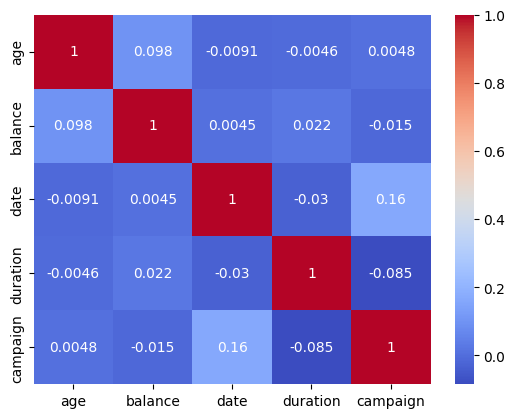

In [14]:
# Checking for multicollinearity 
sns.heatmap(numerical_data.corr(),annot=True,cmap='coolwarm')

## Detecting and Removing Outliers

#### Since our data is non normally distributed we will use IQR detection and removal method for handling outliers

#### Handling outliers in age column

In [15]:
# Calculate Interquartile Range (IQR) for 'age' column
Q1 = df['age'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['age'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range
print('IQR:', IQR)

# Calculate lower and upper bounds for outliers in 'age'
lower_bound_age = round(Q1 - 1.5 * IQR)  # Lower bound (outliers below this value)
upper_bound_age = round(Q3 + 1.5 * IQR)  # Upper bound (outliers above this value)
print('lower_bound_age:', lower_bound_age)
print('upper_bound_age:', upper_bound_age)

IQR: 15.0
lower_bound_age: 10
upper_bound_age: 70


In [16]:
# Number of outliers in Age column
print(df[df['age'] >= upper_bound_age].value_counts().sum()) # so there are 554 values greater than upper limit
print(df[df['age'] <= lower_bound_age].value_counts().sum()) # there are no outliers below the lower limit

554
0


since there are very less numbers of outliers in age column we can directly remove them using trimming method

In [17]:
# Trimming Outliers from age column
outliers = df[(df['age'] <= lower_bound_age) | (df['age'] >= upper_bound_age)].index
df.drop(index=outliers,inplace=True)

#### Handling outliers in balance column

In [18]:
# Calculate Interquartile Range (IQR) for 'balance' column
Q1_balance = df['balance'].quantile(0.25) 
Q3_balance = df['balance'].quantile(0.75)  
IQR_balance = Q3_balance - Q1_balance 
print('IQR (balance):', IQR_balance)

# Calculate lower and upper bounds for outliers in 'balance'
upper_limit_balance = Q3_balance + 1.5 * IQR_balance  
lower_limit_balance = Q1_balance - 1.5 * IQR_balance
print('upper limit (balance):', upper_limit_balance)
print('lower limit (balance):', lower_limit_balance)

IQR (balance): 1335.0
upper limit (balance): 3407.5
lower limit (balance): -1932.5


In [19]:
# Number of outliers in Balance column
print(df[df['balance'] >= upper_limit_balance].value_counts().sum()) # there are 4669 values greater than upper limit
print(df[df['balance'] <= lower_limit_balance].value_counts().sum()) # there are 19 values greater than lower limit

4669
19


here in balance column large numer of outliers are preset so we cannot directly remove them instead we will use capping method

In [20]:
# Capping Outliers
df['balance'] = np.where(df['balance'] >= upper_limit_balance,upper_limit_balance,
                         np.where(df['balance'] <= lower_limit_balance,lower_limit_balance,df['balance']))

#### Handling outliers in duration column

In [21]:
# Calculate Interquartile Range (IQR) for 'duration' column
Q1_duration = df['duration'].quantile(0.25)  
Q3_duration = df['duration'].quantile(0.75)  
IQR_duration = Q3_duration - Q1_duration 
print('IQR (duration):', IQR_duration)

# Calculate lower and upper bounds for outliers in 'duration'
upper_limit_duration = Q3_duration + 1.5 * IQR_duration  
lower_limit_duration = Q1_duration - 1.5 * IQR_duration  
print('upper limit (duration):', upper_limit_duration)
print('lower limit (duration):', lower_limit_duration)

IQR (duration): 214.0
upper limit (duration): 638.0
lower limit (duration): -218.0


In [22]:
# Number of outliers in Duration column
print(df[df['duration'] >= upper_limit_duration].value_counts().sum())
# here also there are large numbers of outliers so we cannot directly remove the so we will use capping method

3246


In [23]:
# Capping Outliers
df['duration'] = np.where(df['duration'] >= upper_limit_duration,upper_limit_duration,df['duration'])

#### Handling outliers in Campaign column

In [24]:
# Calculate Interquartile Range (IQR) for 'campaign' column
Q1_campaign = df['campaign'].quantile(0.25)  
Q3_campaign = df['campaign'].quantile(0.75)  
IQR_campaign = Q3_campaign - Q1_campaign  
print('IQR (campaign):', IQR_campaign)

# Calculate upper bound for outliers in 'campaign'
upper_limit_campaign = Q3_campaign + 1.5 * IQR_campaign 
print('upper limit (campaign):', upper_limit_campaign)

IQR (campaign): 2.0
upper limit (campaign): 6.0


In [25]:
# Number of outliers in Campaign column
df[df['campaign'] >= upper_limit_campaign].value_counts().sum()
# here also there are large numbers of outliers so we cannot directly remove the so we will use capping method

np.int64(4334)

In [26]:
# Capping Outliers
df['campaign'] = np.where(df['campaign'] >= upper_limit_campaign,upper_limit_campaign,df['campaign'])

## Encoding Categorical Data

In [27]:
categorical_data

,job,marital,education,credit_default,housing_loan,personal_loan,contact,month,poutcome,subscribed
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


Using label encoder for target column

In [28]:
# Initialize the LabelEncoder
le = LabelEncoder()
df['subscribed'] = le.fit_transform(df['subscribed'])
print(le.fit_transform(df['subscribed']))
# 0 --> NO
# 1 --> YES

[0 0 0 ... 1 0 0]


Since there is order in the education column we will use ordinal encoder

In [29]:
# Initialize the OrdinalEncoder
oe = OrdinalEncoder(categories=[['unknown','primary','secondary','tertiary']])
df['education'] = oe.fit_transform(df[['education']])

Rest of our data is nominal type so we will use One hot encoder

In [30]:
new_df = df.select_dtypes(exclude = 'number')

In [31]:
# Initialize the OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse_output=False)
encoded_array = ohe.fit_transform(new_df)
print(ohe.fit_transform(new_df))

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]]


In [32]:
encoded_df = pd.DataFrame(encoded_array,columns=ohe.get_feature_names_out()) # Giving column names to encoded columns
encoded_df

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
44653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
44654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
44655,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [33]:
# Merging encoded columns with main dataset and dropping unencoded columns
encoded_df.index = df.index
df = pd.concat([df,encoded_df],axis=1).drop(columns=new_df)

In [34]:
# Now our data looks like this
df.sample(5)

,age,education,balance,date,duration,campaign,subscribed,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
42816,51,0.0,1708.0,29,92.0,3.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30456,47,3.0,178.0,5,17.0,6.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35139,32,2.0,1402.0,7,343.0,3.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
22989,45,3.0,-190.0,26,92.0,4.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2780,31,2.0,752.0,14,178.0,1.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Training the model

In [35]:
# Splitting features
X = df.drop('subscribed',axis=1)
y = df['subscribed']

In [36]:
# Cehcking is our data is balanced or not
y.value_counts()

subscribed
0    39603
1     5054
Name: count, dtype: int64

since our data imbalance we need to balance it

In [37]:
# Splitting the data into trian and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
# Applying SMOTE to balance our data
Smt = SMOTE(random_state=42)
X_resampled, y_resampled = Smt.fit_resample(X_train, y_train)
y_resampled.value_counts()
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

## Training the models

In [39]:
models = {
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier()
}
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f'-----{name}-----')
    print('Accuracy:',accuracy_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('F1 score:',f1_score(y_test,y_pred))
    print('\n')

-----Logistic Regression-----
Accuracy: 0.8275318947865805
Precision: 0.8192004845548153
Recall: 0.8445207617858258
F1 score: 0.8316679477325134


-----Decision Tree-----
Accuracy: 0.9266026145849741
Precision: 0.9223765432098765
Recall: 0.9330315329378708
F1 score: 0.9276734440478038


-----Random Forest-----
Accuracy: 0.9507008977791779
Precision: 0.9659787165430507
Recall: 0.9352169840774274
F1 score: 0.9503489847715736




In [40]:
# Hyperparameter tuning our model to improve performance
RF = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [5, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2'],
    'criterion':['gini','entropy']
}

# Grid Search with 5-fold cross-validation
Grid_search = GridSearchCV(
    estimator=RF,
    param_grid=param_grid,
    cv=5,  
    n_jobs=-1,  
    verbose=2  
)

# Fit the model
Grid_search.fit(X_train, y_train)

# Get best model
best_rf = Grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Print evaluation metrics
print("\nBest Hyperparameters:", Grid_search.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy: 0.951173413135927

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6292
           1       0.97      0.93      0.95      6406

    accuracy                           0.95     12698
   macro avg       0.95      0.95      0.95     12698
weighted avg       0.95      0.95      0.95     12698



In [41]:
# Saving our best model
import joblib

joblib.dump(best_rf,'bank_telemarketing_model.pkl')
print('Model saved successfully!')

Model saved successfully!
